In [2]:
from img_util import imshow
import cv2
import matplotlib.pyplot as plt


In [4]:
import cv2
cat1 = cv2.imread('chill/cat1.jpg')
cat2 = cv2.imread('chill/cat2.jpg')
cat3 = cv2.imread('chill/cat3.jpeg.jpg')

dog1 = cv2.imread('chill/dog1.jpg')
dog2 = cv2.imread('chill/dog2.png')
dog3 = cv2.imread('chill/dog3.png')

In [5]:
sift_d=cv2.SIFT_create() #scale invariant feature transform
orb_d=cv2.ORB_create() 



In [7]:
def detectAndCompute(detector,images):
    kps=[]
    des=[]
    for img in images:
        keypoint , descriptor=detector.detectAndCompute(img,None)
        kps.append(keypoint)
        des.append(descriptor)
    return kps,des
images=[cat1,cat3,dog1,dog2,dog3]
sift_kps,sift_des=detectAndCompute(sift_d,images)
orb_kps,orb_des=detectAndCompute(orb_d,images)

In [9]:
for kp in sift_kps:
    print(len(kp))
print('.......')
for kp in orb_kps:
    print(len(kp))

1349
1734
555
5799
626
.......
500
500
500
500
500


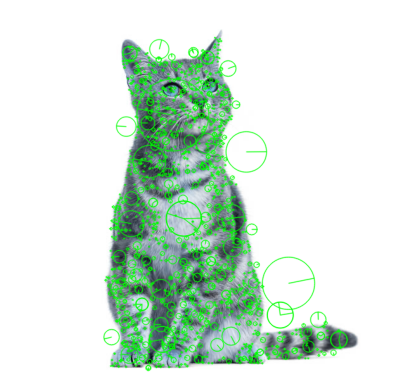

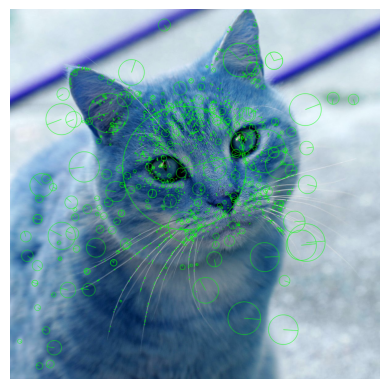

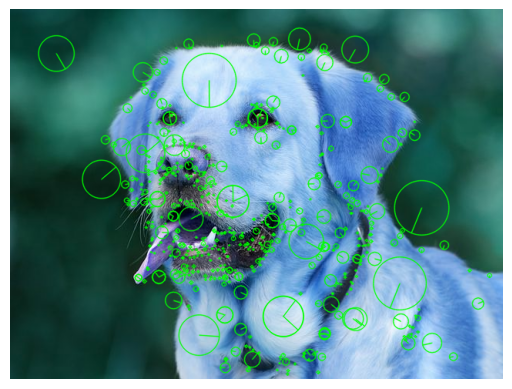

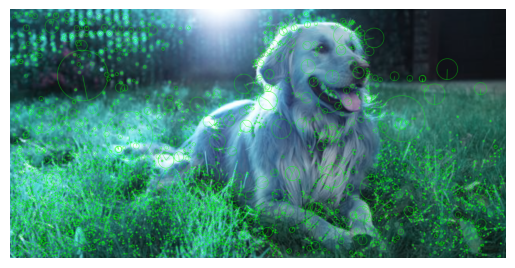

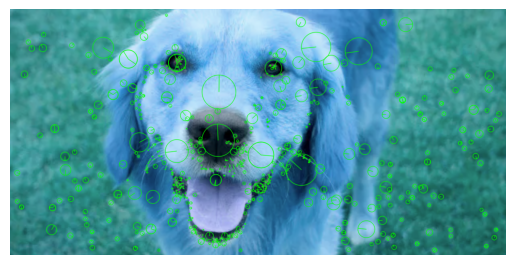

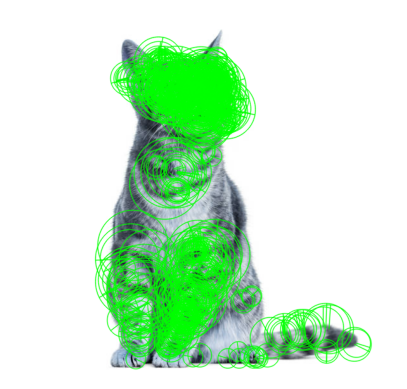

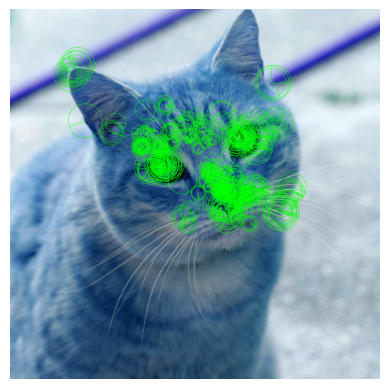

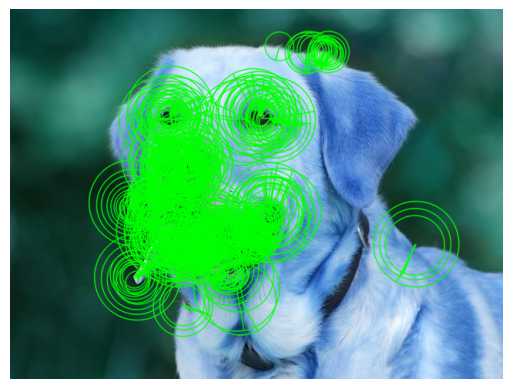

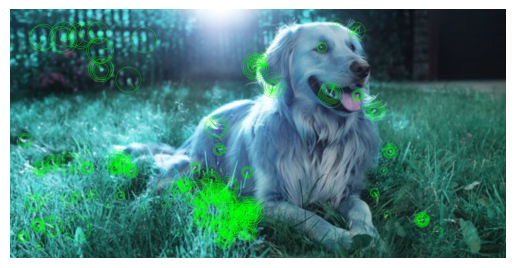

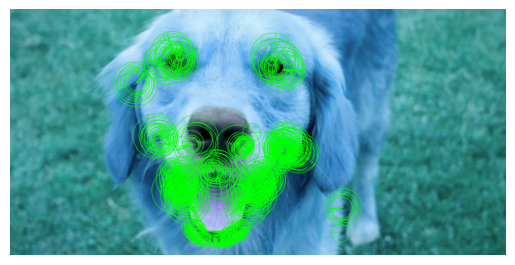

In [22]:
import cv2
import matplotlib.pyplot as plt
from img_util import imshow
def drawKeypoints(img,kp):
    img_kp=cv2.drawKeypoints(
        img,kp,0,(0,255,0),cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
    )
    imshow(img_kp)
    plt.show()
    
for img,kp in zip(images,sift_kps):
    drawKeypoints(img,kp)
for img,kp in zip(images,orb_kps):
    drawKeypoints(img,kp)

In [11]:
a=[3,4,5,6]
b=[4,7,8,9]

In [13]:
a+b

[3, 4, 5, 6, 4, 7, 8, 9]

In [14]:
list(zip(a,b))

[(3, 4), (4, 7), (5, 8), (6, 9)]

In [23]:
matcher=cv2.BFMatcher()

In [34]:
def compare_des(query,descs):
    results=[]
    for des in descs:
        matches=matcher.knnMatch(query,des,k=2)
        count=0
        tol=0.05
        for m1,m2 in matches:
            gap=abs(m1.distance-m2.distance)
            if gap < (tol*m1.distance):
                count+=1
        th=0.90
        if count/len(matches)>th:
            results.append(True)
        else:
            results.append(False)
    return results

sift_res=compare_des(sift_des[-1],sift_des[:-1])
orb_res=compare_des(orb_des[-1],orb_des[:-1])
            

In [38]:
sift_res[1]

False

In [37]:
orb_res

[False, False, False, False]

In [40]:
import numpy as np
def compare_des(query,descs):
    results=[]
    for des in descs:
        matches=matcher.match(query,des)
        matches=[val.distance for val in matches]
        mean=np.mean(matches)
        results.append(mean)
        #matches=matcher.knnMatch(query,des,k=2)
        #count=0
        #tol=0.05
        #for m1,m2 in matches:
         #   gap=abs(m1.distance-m2.distance)
          #  if gap < (tol*m1.distance):
           #     count+=1
        #th=0.90
        #if count/len(matches)>th:
         #   results.append(True)
        #else:
         #   results.append(False)
    return results
    

sift_res=compare_des(sift_des[-1],sift_des[:-1])
orb_res=compare_des(orb_des[-1],orb_des[:-1])
            

In [41]:
labels=['cat','cat','dog','dog']
prediction=labels[sift_res.index(min(sift_res))]
print(prediction)

dog
